# Mass Balance on Tank
Code author: Dr. Robert Hesketh, hesketh@rowan.edu

Source: Example 10.2-1 from Elementary Principles of Chemical Processes, 4th Ed, R.M. Felder, R.W. Rousseau, L. G. Bullard, John Wiley & Sons, 2018

#Chemical Engineering Summer School Workshop Objectives
Make a copy of this template and then 


*   modify the template to solve the problem in which the flowrate out of the tank is $\dot{m}_{OUT}=\frac{4.77{kg}^{0.5}}{s}m^{0.5}$ where $m$ is the mass in the tank.
*   Discuss the difficulties that you had in modifying this template.


# Objectives
- Derive a mass balance on a stirred tank with an inlet and outlet
- Obtain an analytical expression for the mass of liquid in a tank that has a constant flowrate into the tank and a flowrate out of the tank of the form $\dot{m}_{OUT}=kt$
- Using python integrate the mass balance to obtain plot and table of mass in the tank as a function of time.
- Repeat the above with a new equation for the flowrate out of the tank of  $\dot{m}_{OUT}=\frac{4.77{kg}^{0.5}}{s}m^{0.5}$ where $m$ is the mass in the tank.
- Create and solve a problem in which you have 2 tanks in series.  Make a plot of mass in each tank.


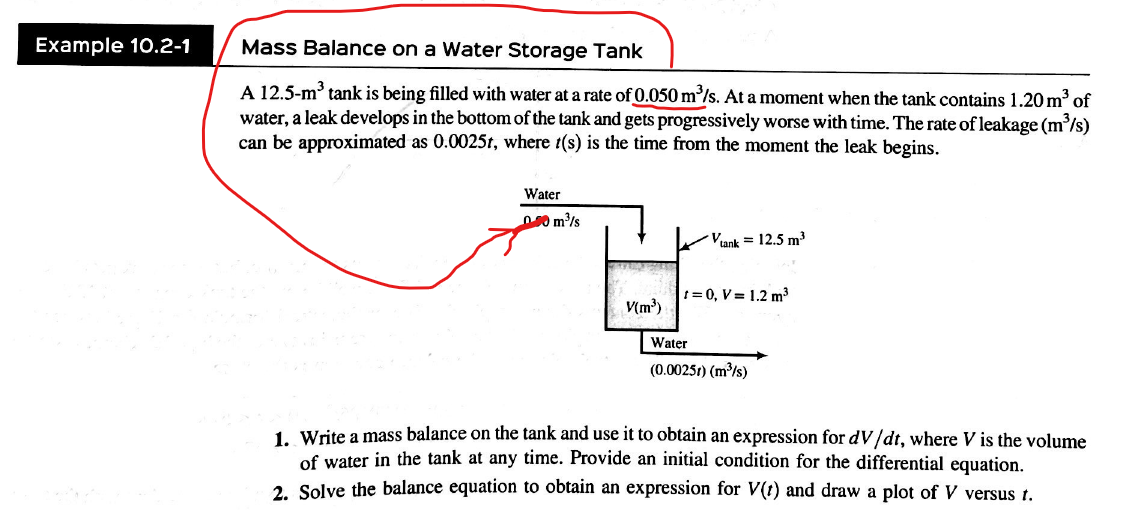

Source: Elementary Principles of Chemical Processes of Chemical Processes Student Workbook, 4th Ed, R.M. Felder, R.W. Rousseau, G.S. Huvard, John Wiley & Sons, 2018

This is written using LaTeX in Markdown display mode<BR>
The control volume of this system is the water in the tank with a mass m or volume V<BR>
$$\text{Accumulation = rate of mass in - rate of mass out}$$ <BR>
$$\frac{dm}{dt}=\dot{m}_{in}-\dot{m}_{out}$$ 
$$\dot{m}_{in}=\rho \nu_{in}=\rho \,0.05\,m^3/s$$<BR>
$$\dot{m}_{out}=\rho \nu_{out} =\rho\, (0.0025\,m^3/s) t$$<BR>
$$m=\rho V$$<BR>
$$\text{at}\, t=0\,V=1.2 m^3$$<BR>
Assuming constant density the mass balance results in a volume balance

$$\frac{dV}{dt}=0.05\,m^3/s-(0.0025\,m^3/s^2) t$$
Notice that the units of $0.0025t[=]m^3/s$ so the units of the constant are $0.0025 m^3/s^2$


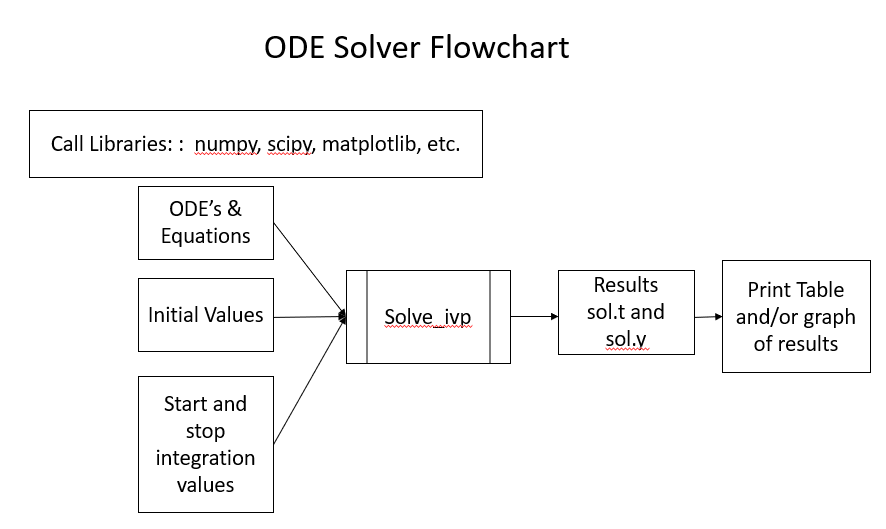

# Procedure

1. Derive differential equations for the python model of your system (_e.g._ dy/dt=a-b*t)
2. Create a function in Jupyter Notebook cell that contains the differential equations (_e.g._ dy/dt=a-b*t)<br>
    a. The function name is defined using **<font color=green>def</font> <font color=blue>FUNCTIONname</font>** (t,Yfuncvec): <br>
    b. we will use ODEfun for the name. After the function name and within parenthesis list the variables passed in as t and Yfuncvec. <br>
    c.  start with unpacking the Yfuncvec V = Yfuncvec[0] This allows you to use the variable name V in the equations in 
    the function  
    d.  define the derivative using typed variables.  (_e.g._ dVdt=0.05-0.0025*t )  
    e.  create an array of the values of the derivative defined above. ( _e.g._ dYfuncvecdt = [dVdt])   
    f.  End the function with the line <font color=green> <strong> return </strong> </font>  followed by the name of the 
    array that contains the derivatives. (_e.g._ dYfuncvecdt) 
3. Notice that all lines in a function have to be indented. (See below lins 6-10 are indented)
4. Give the initial conditions (_e.g._ at t=0 what is y) as tspan=(0,80) for 0 to 80 s
5. Give the initial values of the variables.  for two tanks that have 100 kg each y0=[100,100]






# Call Libraries
Python uses libraries that contain commonly used functions.  The cell below calls these libraries.

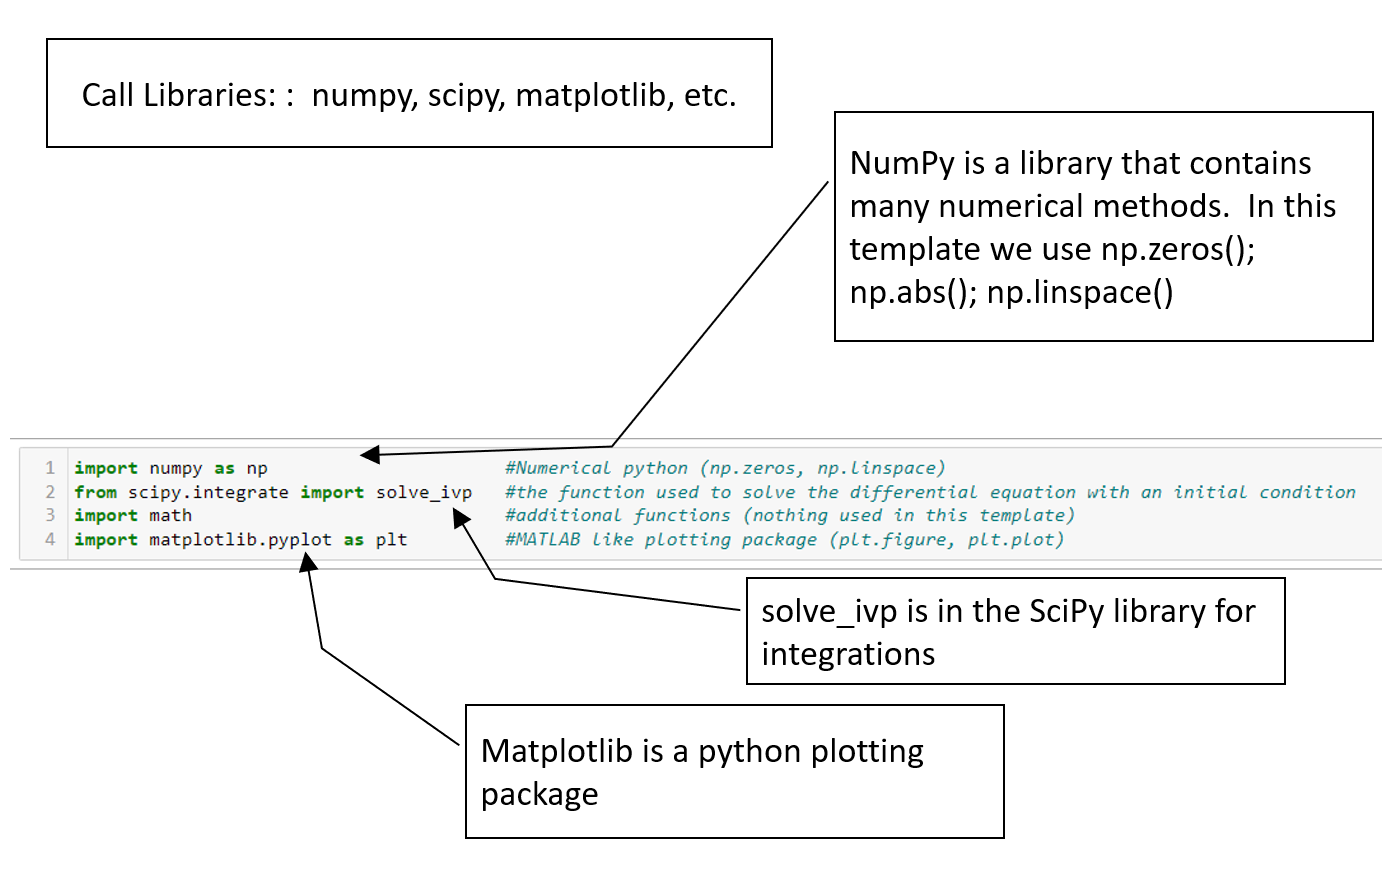

In [1]:
import numpy as np                      #Numerical python (np.zeros, np.linspace)
from scipy.integrate import solve_ivp   #the function used to solve the differential equation with an initial condition
import math                             #additional functions (nothing used in this template)
import matplotlib.pyplot as plt         #MATLAB like plotting package (plt.figure, plt.plot)

# Write a function that contains the ODE

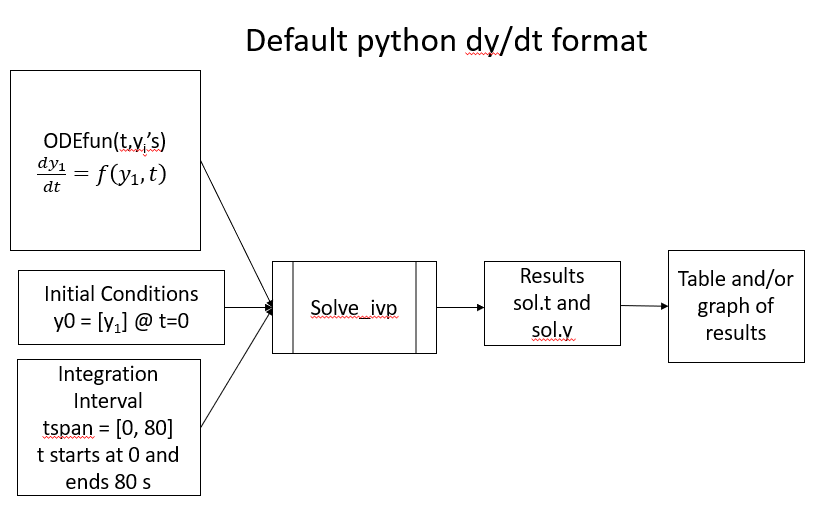

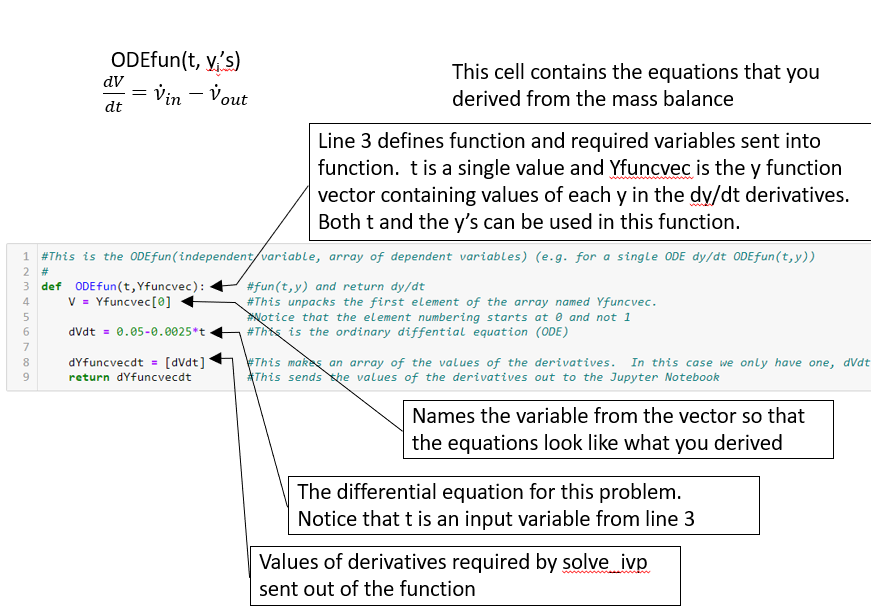

This function named <font color=blue>ODEfun</font>  returns the value of the derivative of dVdt so that it can be integrated using the python function solve_ivp.  
Solve_ivp requires that you input a function that has inputs of the independent variable (t) and the dependent variable V is passed out of the function as the 
array Yfuncvec.  ODEfun(independent variable, array of dependent variables) (e.g. for dy/dt ODEfun(t,y))


In [2]:
#This is the ODEfun(independent variable, array of dependent variables) (e.g. for a single ODE dy/dt ODEfun(t,y))
#
def  ODEfun(t,Yfuncvec):      #fun(t,y) and return dy/dt
    V = Yfuncvec[0]           #This unpacks the first element of the array named Yfuncvec.  
                              #Notice that the element numbering starts at 0 and not 1
    dVdt = 0.05-0.0025*t      #This is the ordinary diffential equation (ODE) 
     
    dYfuncvecdt = [dVdt]      #This makes an array of the values of the derivatives.  In this case we only have one, dVdt
    return dYfuncvecdt        #This sends the values of the derivatives out to the Jupyter Notebook

# Test the function!

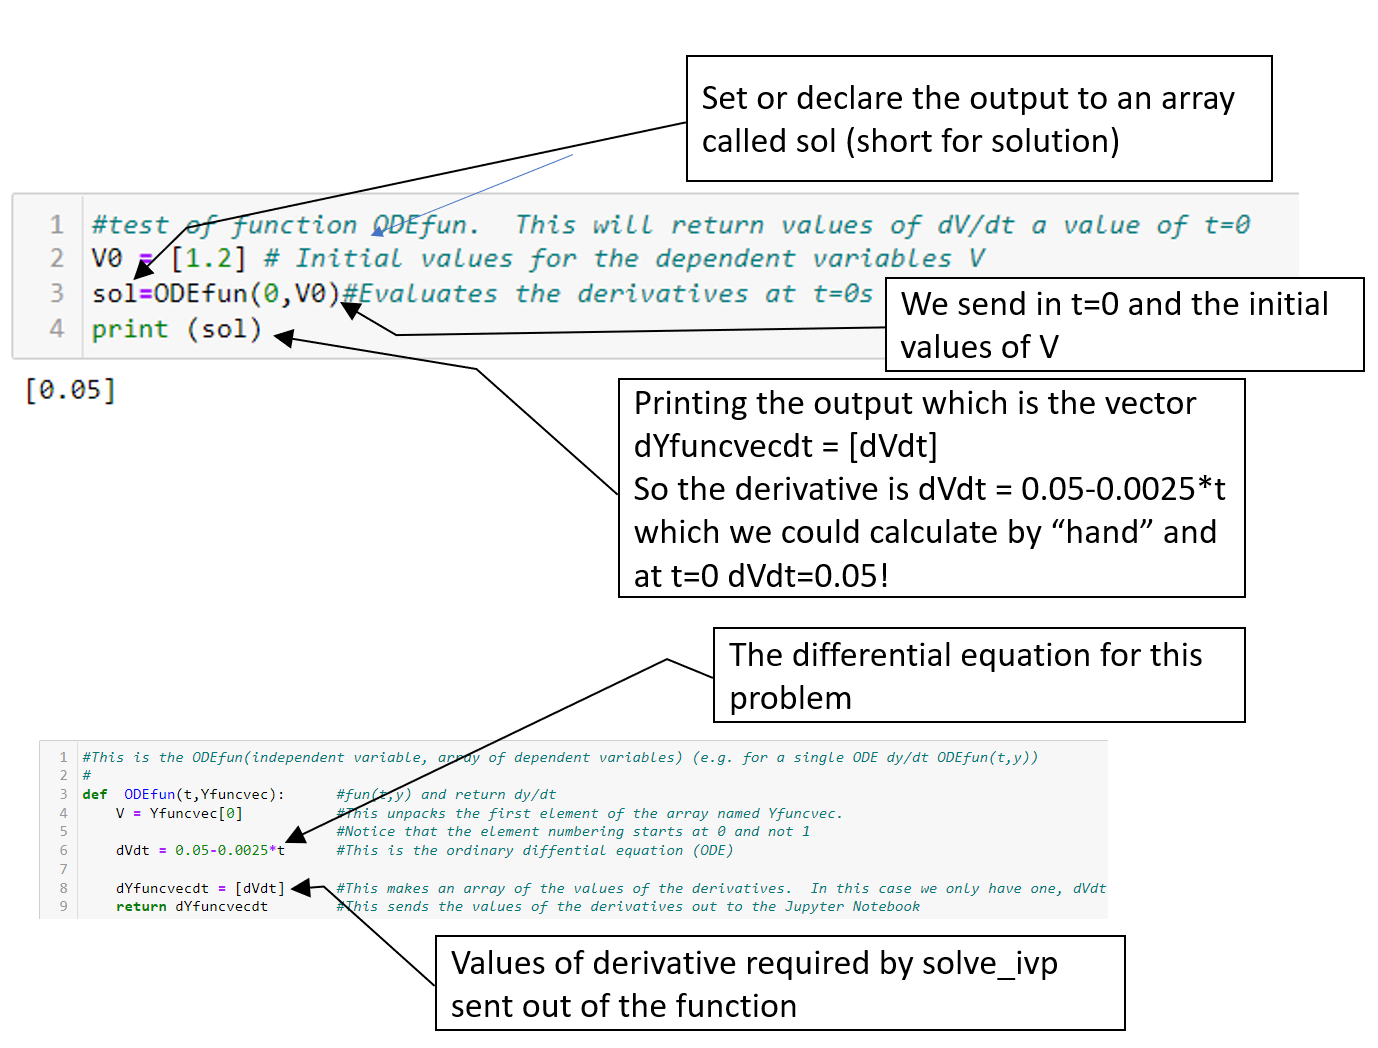

In [3]:
#test of function ODEfun.  This will return values of dV/dt a value of t=0
V0 = [1.2] # Initial values for the dependent variables V
sol=ODEfun(0,V0)#Evaluates the derivatives at t=0s
print (sol)

[0.05]


# Solve the ODE
In the cell below is an explanation of how the ODE solver is called to integrate the ODE:

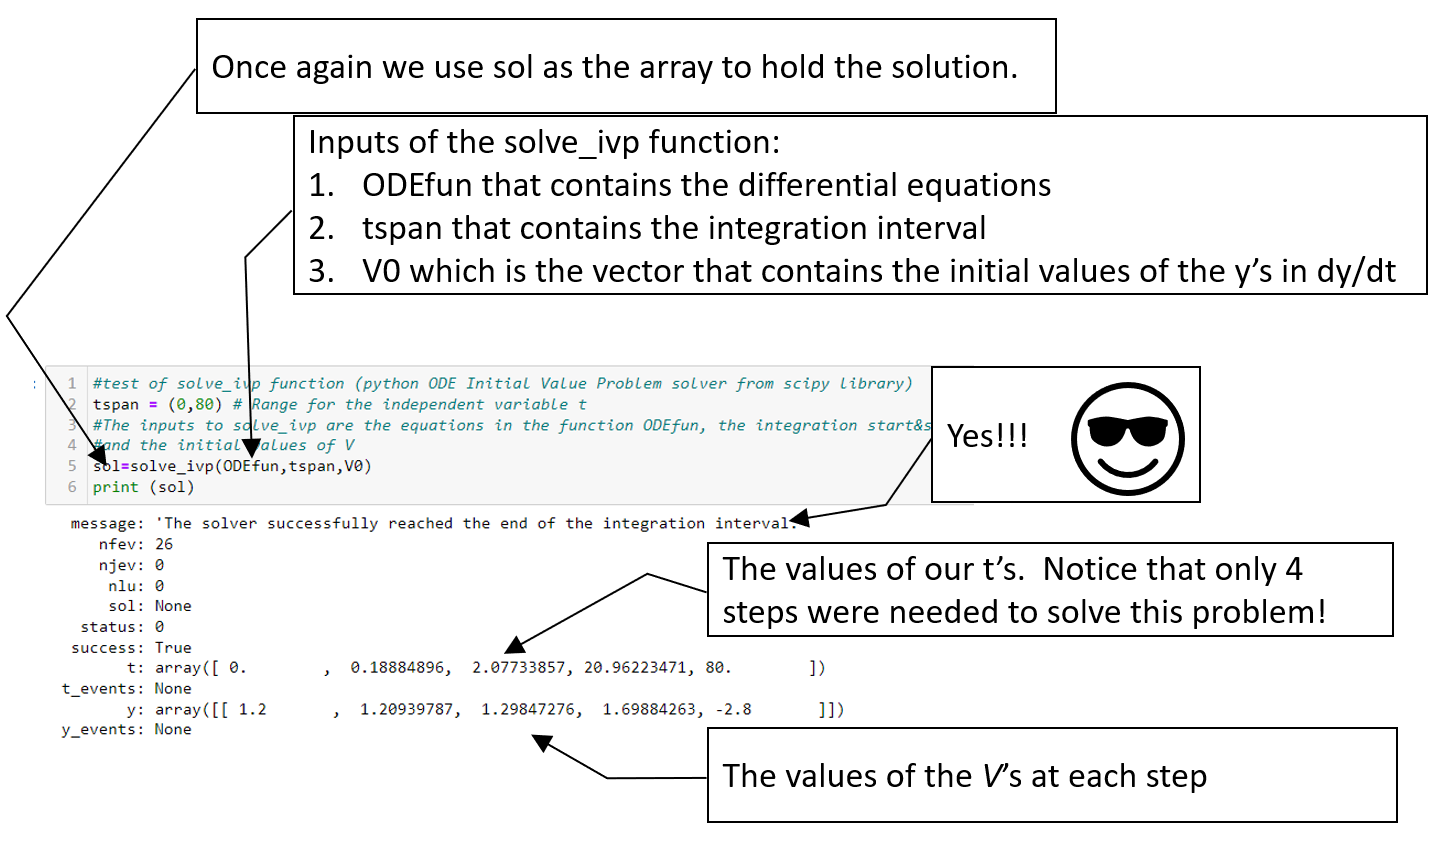

In [5]:
#test of solve_ivp function (python ODE Initial Value Problem solver from scipy library)
tspan = (0,80) # Range for the independent variable t 
#The inputs to solve_ivp are the equations in the function ODEfun, the integration start&stop, 
#and the initial values of V
sol=solve_ivp(ODEfun,tspan,V0) 
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.18884896,  2.07733857, 20.96223471, 80.        ])
 t_events: None
        y: array([[ 1.2       ,  1.20939787,  1.29847276,  1.69884263, -2.8       ]])
 y_events: None


The above output has values of V at given values of t.  For example at t=0 V=1.2 and the last value is at t=80 V=-2.8.
How could you have a negative value of fluid in this tank?  What went wrong?  Comment in the cell below:

In [4]:
# This prints the values of t.  Notice python uses the generic dy/dt notation for a derivative. 
#The solve_ivp function uses a "variable step size" that it determines based on the complexity of the problem
#The more complex the more steps are needed e.g. smaller step sizes
print(sol.t)

AttributeError: ignored

In [ ]:
print(sol.y) # This prints the values for V.  This is based on dy/dt notation where y is V 

[[ 1.2         1.20939787  1.29847276  1.69884263 -2.8       ]]


In [ ]:
print('prints V')
print(sol.y[0])

prints V
[ 1.2         1.20939787  1.29847276  1.69884263 -2.8       ]


The analytical solution to this derivative is obtained as follows
$$\int_{1.2m^3}^V(\frac{dV}{dt})dt=\int_0^{80s} \left(0.05\frac{m^3}{s}-(0.0025\frac{m^3}{s^2}) t\right) dt$$
$$V\bigg|_{1.2m^3}^V= \left(0.05\frac{m^3}{s}t-(0.0025\frac{m^3}{s^2}) \frac{t^2}{2}\bigg|_0^{t}\right)$$
$$V=1.2m^3+0.05\frac{m^3}{s}t-(0.00125\frac{m^3}{s^2})t^2$$

# Let's Print a table of Results

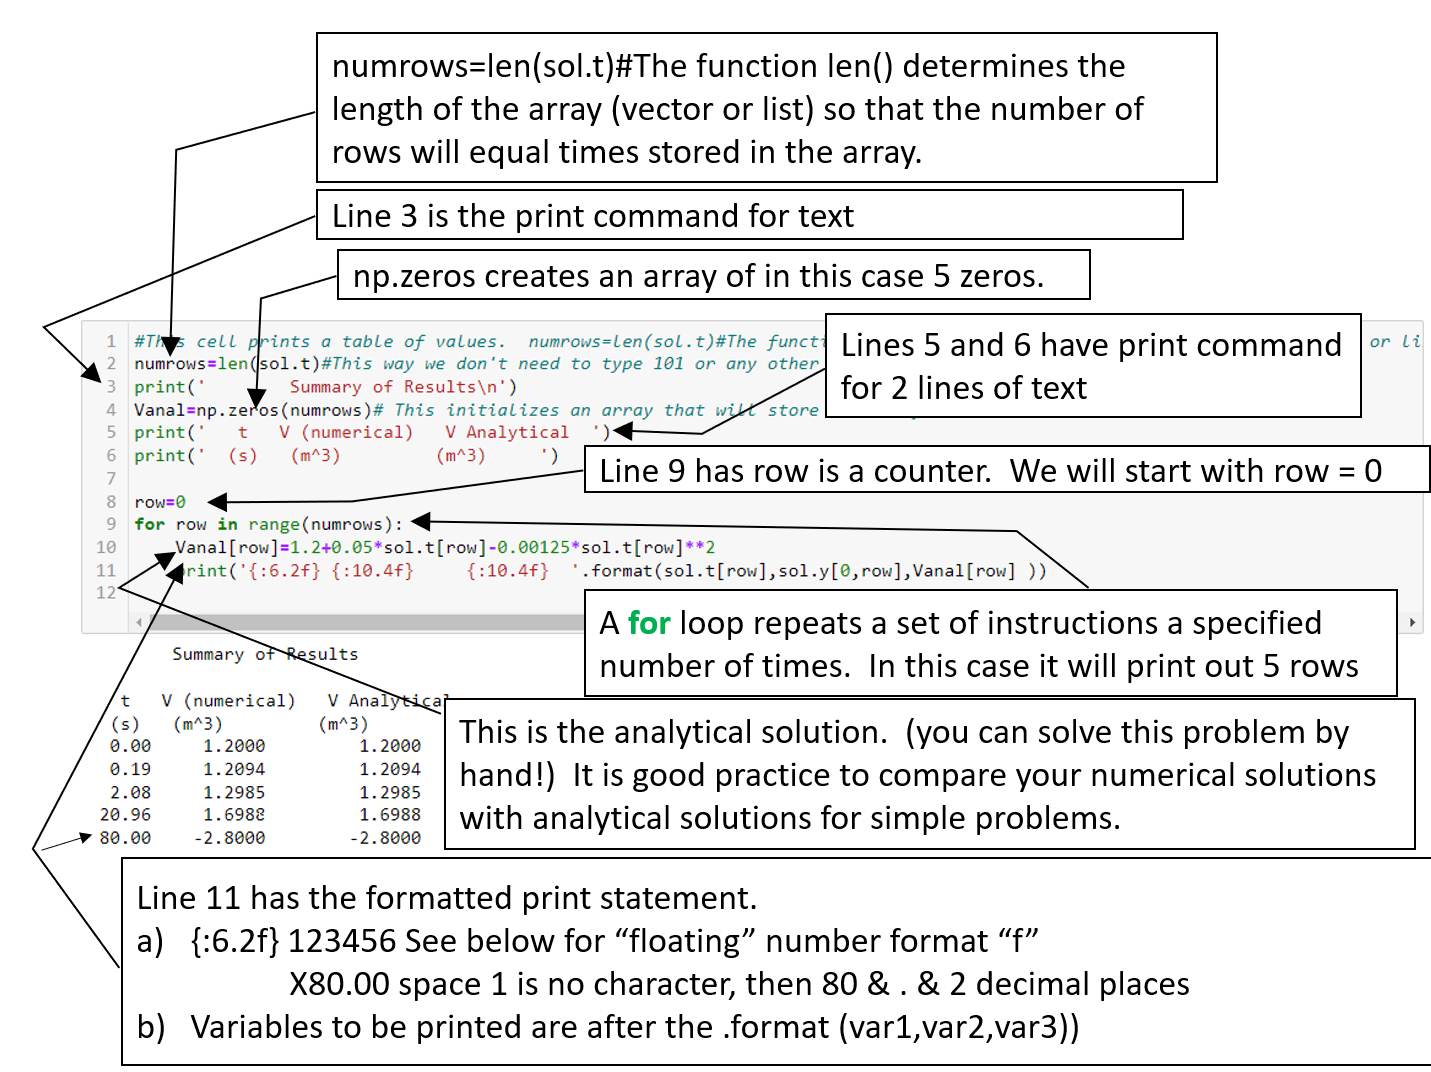

In [ ]:
#This cell prints a table of values.  numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
teval=np.linspace(tspan[0],tspan[1],101)
sol=solve_ivp(ODEfun,tspan,V0,t_eval=teval)
numrows=len(sol.t)#This way we don't need to type 101 or any other number
print('        Summary of Results\n')
Vanal=np.zeros(numrows)# This initializes an array that will store the analytical solution
print('   t   V (numerical)   V Analytical  ')
print('  (s)   (m^3)         (m^3)     ')

row=0
for row in range(numrows):
    Vanal[row]=1.2+0.05*sol.t[row]-0.00125*sol.t[row]**2
    print('{:6.2f} {:10.4f}     {:10.4f}  '.format(sol.t[row],sol.y[0,row],Vanal[row] ))

        Summary of Results

   t   V (numerical)   V Analytical  
  (s)   (m^3)         (m^3)     
  0.00     1.2000         1.2000  
  0.80     1.2392         1.2392  
  1.60     1.2768         1.2768  
  2.40     1.3128         1.3128  
  3.20     1.3472         1.3472  
  4.00     1.3800         1.3800  
  4.80     1.4112         1.4112  
  5.60     1.4408         1.4408  
  6.40     1.4688         1.4688  
  7.20     1.4952         1.4952  
  8.00     1.5200         1.5200  
  8.80     1.5432         1.5432  
  9.60     1.5648         1.5648  
 10.40     1.5848         1.5848  
 11.20     1.6032         1.6032  
 12.00     1.6200         1.6200  
 12.80     1.6352         1.6352  
 13.60     1.6488         1.6488  
 14.40     1.6608         1.6608  
 15.20     1.6712         1.6712  
 16.00     1.6800         1.6800  
 16.80     1.6872         1.6872  
 17.60     1.6928         1.6928  
 18.40     1.6968         1.6968  
 19.20     1.6992         1.6992  
 20.00     1.7000         

That's too many points for a table!

In [ ]:
#This cell prints a table of values.  numrows=len(sol.t)#The function len() determines the length of the array (vector or list) 
teval=np.linspace(tspan[0],tspan[1],11)
sol=solve_ivp(ODEfun,tspan,V0,t_eval=teval)
numrows=len(sol.t)#This way we don't need to type 101 or any other number
print('        Summary of Results\n')
Vanal=np.zeros(numrows)# This initializes an array that will store the analytical solution
print('   t   V (numerical)   V Analytical  ')
print('  (s)   (m^3)         (m^3)     ')

row=0
for row in range(numrows):
    Vanal[row]=1.2+0.05*sol.t[row]-0.00125*sol.t[row]**2
    print('{:6.2f} {:10.4f}     {:10.4f}  '.format(sol.t[row],sol.y[0,row],Vanal[row] ))

        Summary of Results

   t   V (numerical)   V Analytical  
  (s)   (m^3)         (m^3)     
  0.00     1.2000         1.2000  
  8.00     1.5200         1.5200  
 16.00     1.6800         1.6800  
 24.00     1.6800         1.6800  
 32.00     1.5200         1.5200  
 40.00     1.2000         1.2000  
 48.00     0.7200         0.7200  
 56.00     0.0800         0.0800  
 64.00    -0.7200        -0.7200  
 72.00    -1.6800        -1.6800  
 80.00    -2.8000        -2.8000  


# Make a plot of the results!
Plotting the results from t = 0 to 80s


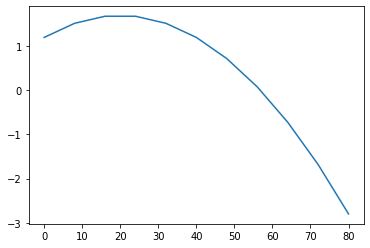

In [ ]:
#This is a simple plot
plt.plot(sol.t,sol.y[0])

# What? You want to know exactly when the tank volume is empty?
This shows an unrealistic answer since we can not go below zero in the tank.
To find this time we can request the solve_ivp to give us more points and
 - make a plot and read the value of t at V=0
 - print out a table of values and look for t at V=0
 - or we can add in a second differential equation to give the time that V=0.

In [ ]:
#The above plot is not very smooth.  If we use more points we will get a better plot.
#This command (np.linspace) creates a list or vector of 21 values starting from the first value in tspan (t=0) and the last value in tspan (t=80).  
#It will divide the V's into 21 points with spacing 80/20=4. A large number of values is good for plots but in tables you only want a few rows.
teval=np.linspace(tspan[0],tspan[1],21)
print(teval)

[ 0.  4.  8. 12. 16. 20. 24. 28. 32. 36. 40. 44. 48. 52. 56. 60. 64. 68.
 72. 76. 80.]


In [ ]:
#makes a smoother line by using more values
teval=np.linspace(tspan[0],tspan[1],101)
sol=solve_ivp(ODEfun,tspan,V0,t_eval=teval)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 26
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
        8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
       17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2, 24. , 24.8, 25.6,
       26.4, 27.2, 28. , 28.8, 29.6, 30.4, 31.2, 32. , 32.8, 33.6, 34.4,
       35.2, 36. , 36.8, 37.6, 38.4, 39.2, 40. , 40.8, 41.6, 42.4, 43.2,
       44. , 44.8, 45.6, 46.4, 47.2, 48. , 48.8, 49.6, 50.4, 51.2, 52. ,
       52.8, 53.6, 54.4, 55.2, 56. , 56.8, 57.6, 58.4, 59.2, 60. , 60.8,
       61.6, 62.4, 63.2, 64. , 64.8, 65.6, 66.4, 67.2, 68. , 68.8, 69.6,
       70.4, 71.2, 72. , 72.8, 73.6, 74.4, 75.2, 76. , 76.8, 77.6, 78.4,
       79.2, 80. ])
 t_events: None
        y: array([[ 1.2   ,  1.2392,  1.2768,  1.3128,  1.3472,  1.38  ,  1.4112,
         1.4408,  1.4688,  1.4952,  1.52  ,  1.

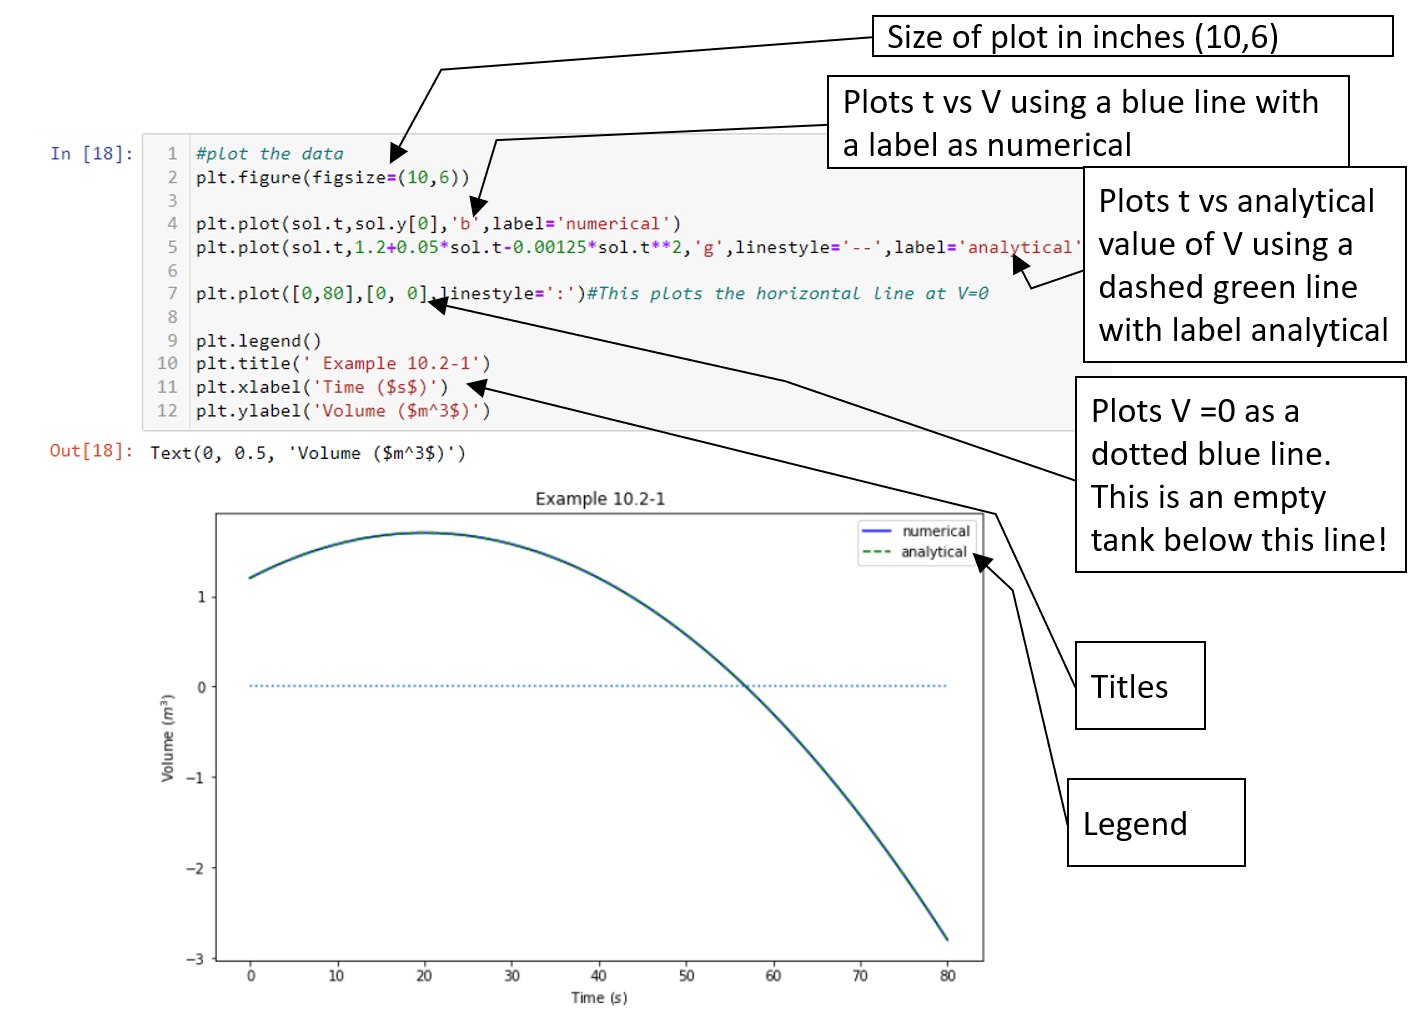

Text(0, 0.5, 'Volume ($m^3$)')

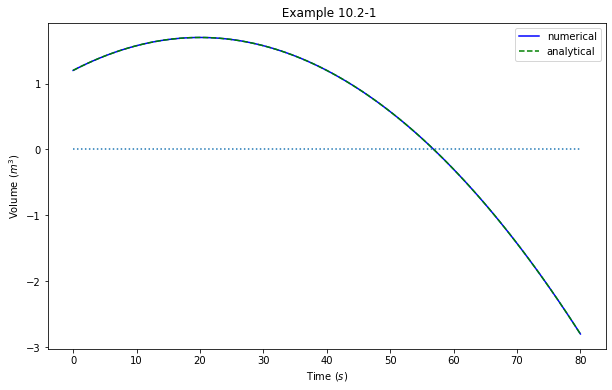

In [ ]:
#plot the data
plt.figure(figsize=(10,6))

plt.plot(sol.t,sol.y[0],'b',label='numerical')
plt.plot(sol.t,1.2+0.05*sol.t-0.00125*sol.t**2,'g',linestyle='--',label='analytical')

plt.plot([0,80],[0, 0],linestyle=':')#This plots the horizontal line at V=0

plt.legend()
plt.title(' Example 10.2-1')
plt.xlabel('Time ($s$)')
plt.ylabel('Volume ($m^3$)')

Here is the method of printing out a very large table of numbers to find the time to drain the tank:

In [ ]:
#This cell prints a table of 101 values.  The goal is to find when the tank has drained.
numrows=len(sol.t)#This way we don't need to type 101 or any other number
print('        Summary of Results\n')
Vanal=np.zeros(numrows)# This initializes an array that will store the analytical solution
print('   t   V (numerical)   V Analytical  ')
print('  (s)   (m^3)         (m^3)     ')

row=0
for row in range(101):
    Vanal[row]=1.2+0.05*sol.t[row]-0.00125*sol.t[row]**2
    print('{:6.2f} {:10.4f}     {:10.4f}  '.format(sol.t[row],sol.y[0,row],Vanal[row] ))



        Summary of Results

   t   V (numerical)   V Analytical  
  (s)   (m^3)         (m^3)     
  0.00     1.2000         1.2000  
  0.80     1.2392         1.2392  
  1.60     1.2768         1.2768  
  2.40     1.3128         1.3128  
  3.20     1.3472         1.3472  
  4.00     1.3800         1.3800  
  4.80     1.4112         1.4112  
  5.60     1.4408         1.4408  
  6.40     1.4688         1.4688  
  7.20     1.4952         1.4952  
  8.00     1.5200         1.5200  
  8.80     1.5432         1.5432  
  9.60     1.5648         1.5648  
 10.40     1.5848         1.5848  
 11.20     1.6032         1.6032  
 12.00     1.6200         1.6200  
 12.80     1.6352         1.6352  
 13.60     1.6488         1.6488  
 14.40     1.6608         1.6608  
 15.20     1.6712         1.6712  
 16.00     1.6800         1.6800  
 16.80     1.6872         1.6872  
 17.60     1.6928         1.6928  
 18.40     1.6968         1.6968  
 19.20     1.6992         1.6992  
 20.00     1.7000         

Below is an example of a new function in which we add an ODE to *count* the time required to drain the tank.

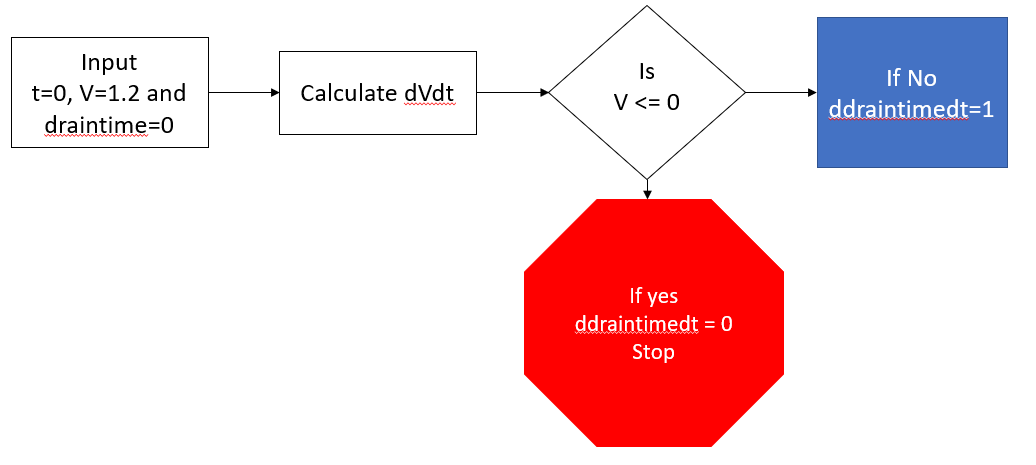

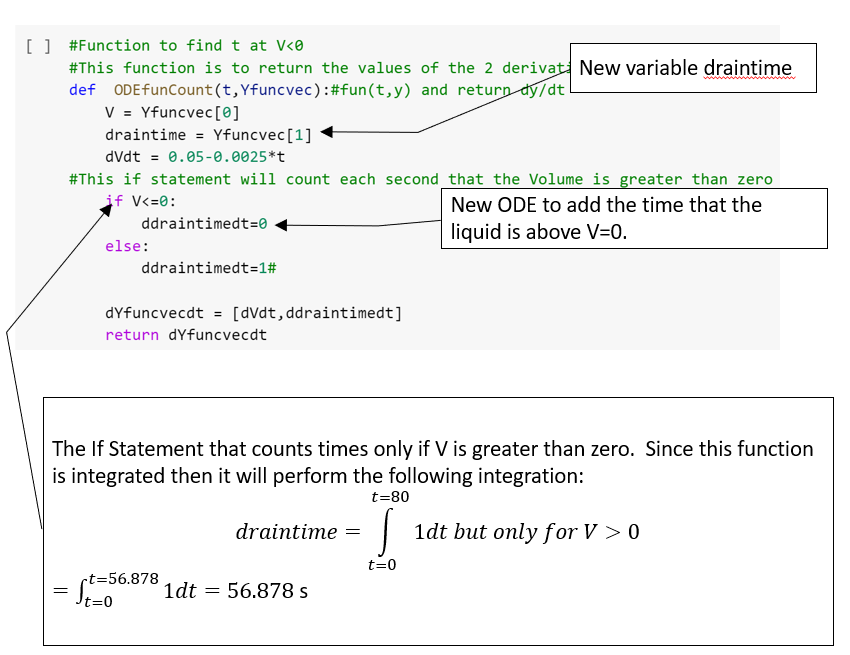

In [ ]:
#Function to find t at V<0
#This function is to return the values of the 2 derivatives
def  ODEfunCount(t,Yfuncvec):#fun(t,y) and return dy/dt
    V = Yfuncvec[0] 
    draintime = Yfuncvec[1]
    dVdt = 0.05-0.0025*t 
#This if statement will count each second that the Volume is greater than zero
    if V<=0:
        ddraintimedt=0
    else:
        ddraintimedt=1#
     
    dYfuncvecdt = [dVdt,ddraintimedt] 
    return dYfuncvecdt 

In [ ]:
#test of function ODEfunCount.  This will return values of dFA/dV=rA and dFB/dV=-rA at a value of V
V0 = [1.2,0] # Initial values for the dependent variables V
sol=ODEfunCount(0,V0)#Evaluates the derivatives at t=0s
print (sol)

[0.05, 1]


In [ ]:
#Solve the revised function
tspan=(0,80)
teval=np.linspace(tspan[0],tspan[1],101)
sol=solve_ivp(ODEfunCount,tspan,V0,t_eval=teval,rtol=1e-8)#We needed to add an relative tolerance (rtol) to get a precise answer
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 266
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
        8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
       17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2, 24. , 24.8, 25.6,
       26.4, 27.2, 28. , 28.8, 29.6, 30.4, 31.2, 32. , 32.8, 33.6, 34.4,
       35.2, 36. , 36.8, 37.6, 38.4, 39.2, 40. , 40.8, 41.6, 42.4, 43.2,
       44. , 44.8, 45.6, 46.4, 47.2, 48. , 48.8, 49.6, 50.4, 51.2, 52. ,
       52.8, 53.6, 54.4, 55.2, 56. , 56.8, 57.6, 58.4, 59.2, 60. , 60.8,
       61.6, 62.4, 63.2, 64. , 64.8, 65.6, 66.4, 67.2, 68. , 68.8, 69.6,
       70.4, 71.2, 72. , 72.8, 73.6, 74.4, 75.2, 76. , 76.8, 77.6, 78.4,
       79.2, 80. ])
 t_events: None
        y: array([[ 1.20000000e+00,  1.23920000e+00,  1.27680000e+00,
         1.31280000e+00,  1.34720000e+00,  1.38000000e+00,

From the above more stringent convergence criteria the drain time matches the analytical solution given below.

In [ ]:
print('The drain time is {:6.3f}s'  .format(sol.y[1][-1]))


The drain time is 56.878s


We can have python find a numerical solution to the $$V=1.2m^3+0.05\frac{m^3}{s}t-(0.00125\frac{m^3}{s^2})t^2$$

In [ ]:
from scipy.optimize import fsolve
def root(t):
    fv=1.2+0.05*t-0.00125*t**2 #solving the equation for zero
    return fv
tGuess = [50]

draintime=fsolve(root,tGuess)
print(draintime)
fv=root(draintime)#fv was not defined outside of the function so I define it here
print(fv) #This will give the fx values near zero

[56.87817783]
[8.8817842e-16]


Or we could simply use the quadratic equation
$$\frac{-b\pm\sqrt{b^2-4ac}}{2a}$$

In [ ]:
draintime=(-0.05-(0.05**2-4*(-0.00125)*1.2)**0.5)/2/(-0.00125)
print('The drain time is {:6.3f}s'  .format((-0.05-(0.05**2-4*(-0.00125)*1.2)**0.5)/2/(-0.00125)))

The drain time is 56.878s


Now the analytical and numerical drain times match!

In [ ]:
print('The analytical drain time is {:6.3f}s and the numerical time is {:6.3f}s which is a percent difference of {:6.3e}'  .format(draintime,sol.y[1,-1],(draintime-sol.y[1,-1])/draintime*100))

The analytical drain time is 56.878s and the numerical time is 56.878s which is a percent difference of -1.369e-04


# Assigned Problems

## Make a copy of this template and modify the template to solve the problem in which the flowrate out of the tank is $\dot{m}_{OUT}=\frac{4.77{kg}^{0.5}}{s}m^{0.5}$ where $m$ is the mass in the tank.

## Create a simulation of 2 tanks in series in which the fluid leaving the first and second tanks is proportional to the $V^{0.5}$ and the feed to the first tank is a constant flowrate.